<a href="https://colab.research.google.com/github/jchen42703/CapsNetsLASeg/blob/examples/examples/Importing_and_Preprocessing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and Preprocessing the Cardiac MRIs
The dataset is taken from Task 2 of the Medical Segmentation Decathlon (MSD). It's comprised of twenty patients with slice areas of 320 by 320. The depth in the slices vary, but the voxel spacing is constant (1.25, 1.25, 1.37; x, y, z). <br>
__This notebook is a quick tutorial on how to actually get the dataset into Colaboratory and how to use the repository to preprocess said data.__


# Downloading Original Cardiac MRI dataset

In [0]:
import os
from os.path import exists
import tarfile

from google_drive_downloader import GoogleDriveDownloader as gdd
# https://drive.google.com/open?id=1wEB2I6S6tQBVEPxir8cA5kFB8gTQadYY
def download_dataset(dest_path, dataset, id='1wEB2I6S6tQBVEPxir8cA5kFB8gTQadYY'):
    tar_path = os.path.join(dest_path, dataset) + '.tar'
    gdd.download_file_from_google_drive(file_id=id,
                                        dest_path=tar_path, overwrite=False,
                                        unzip=False)

    if not exists(os.path.join(dest_path, dataset)):
        print('Extracting data [STARTED]')
        tar = tarfile.open(tar_path)
        tar.extractall(dest_path)
        print('Extracting data [DONE]')
    else:
        print('Data already downloaded. Files are not extracted again.')

    return

In [0]:
def load_MSD(task_no = 1, base_dir = '/content/'):
  if task_no == 1:
    dataset = "Task01_BrainTumour"
    id = '1A2IU8Sgea1h3fYLpYtFb2v7NYdMjvEhU'
  elif task_no == 2:
    dataset = "Task02_Heart"
    id = '1wEB2I6S6tQBVEPxir8cA5kFB8gTQadYY'
  elif task_no == 3: 
    dataset = "Task03_Liver"
    id = '1jyVGUGyxKBXV6_9ivuZapQS8eUJXCIpu'
  download_dataset(base_dir, dataset, id)
  return 

In [3]:
load_MSD(task_no = 2, base_dir = '/content')

Extracting data [STARTED]
Extracting data [DONE]


In [4]:
!ls

sample_data  Task02_Heart  Task02_Heart.tar


# Preprocessing the Data
* Done in the same way as specific in [nnU-Net: Self-adapting Framework for U-Net-Based Medical Image Segmentation](https://arxiv.org/abs/1809.10486) by Isensee et al. <br>
__Basic Steps__
1. Cropping
2. Resampling to the Median Spacing
3. Standardization

In [5]:
! rm -r CapsNetsLASeg
! git clone https://github.com/jchen42703/CapsNetsLASeg.git

rm: cannot remove 'CapsNetsLASeg': No such file or directory
Cloning into 'CapsNetsLASeg'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 31 (delta 2), reused 31 (delta 2), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [21]:
! rm -r keras_med_io
!git clone https://github.com/jchen42703/keras_med_io.git
% cd '/content/keras_med_io'
! pip install .
% cd '/content/'

rm: cannot remove 'keras_med_io': No such file or directory
Cloning into 'keras_med_io'...
remote: Enumerating objects: 779, done.
remote: Counting objects: 100% (779/779), done.
remote: Compressing objects: 100% (480/480), done.
remote: Total 779 (delta 428), reused 633 (delta 288), pack-reused 0
Receiving objects: 100% (779/779), 3.91 MiB | 7.11 MiB/s, done.
Resolving deltas: 100% (428/428), done.
/content/keras_med_io
Processing /content/keras_med_io
    100% |████████████████████████████████| 102kB 14.2MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-3_b2n1iv/wheels/8a/be/68/45492440274bf89125626a276a1f68446e94ad69285bae289f
  Stored in directory: /root/.cache/pip/wheels/2a/ee/38/2db84d52f050000a02e4145742202dd6f22f62e59f2c370b34
Successfully built keras-med-io batchgenerators


/content


In [40]:
%cd CapsNetsLASeg
import capsnets_laseg
from capsnets_laseg.io.io import LocalPreprocessingBinarySeg
input_dir = '/content/Task02_Heart'
output_dir = '/content/Heart_Isensee'
preprocess = LocalPreprocessingBinarySeg(input_dir, output_dir)

/content/CapsNetsLASeg
Created directory:  /content/Heart_Isensee
Metadata scanning completed!


In [37]:
import os
training_dir = os.path.join(input_dir, 'imagesTr')
labels_dir = os.path.join(input_dir, 'labelsTr')
# os.chdir(training_dir)
os.chdir(labels_dir)
print(os.getcwd())
! rm -r ._*
!ls
os.chdir('/content/')

/content/Task02_Heart/labelsTr
rm: cannot remove '._*': No such file or directory
la_003.nii.gz  la_009.nii.gz  la_016.nii.gz  la_020.nii.gz  la_024.nii.gz
la_004.nii.gz  la_010.nii.gz  la_017.nii.gz  la_021.nii.gz  la_026.nii.gz
la_005.nii.gz  la_011.nii.gz  la_018.nii.gz  la_022.nii.gz  la_029.nii.gz
la_007.nii.gz  la_014.nii.gz  la_019.nii.gz  la_023.nii.gz  la_030.nii.gz


In [41]:
preprocess.gen_data()

Created directory:  /content/Heart_Isensee/imagesTr
Created directory:  /content/Heart_Isensee/labelsTr
Saved: la_018
Saved: la_019
Saved: la_003
Saved: la_026
Saved: la_009
Saved: la_029
Saved: la_023
Saved: la_007
Saved: la_011
Saved: la_021
Saved: la_030
Saved: la_020
Saved: la_022
Saved: la_024
Saved: la_017
Saved: la_005
Saved: la_016
Saved: la_014
Saved: la_010
Saved: la_004


# Visualizing the Data

In [56]:
import os
from os.path import join
import numpy as np
import nibabel as nib

images_path, labels_path = join(output_dir, "imagesTr"), join(output_dir, "labelsTr")
orig_images_path, orig_labels_path = join(input_dir, "imagesTr"), join(input_dir, "labelsTr")
saved_file_list = os.listdir(images_path)
orig_saved_file_list = os.listdir(orig_images_path)
# loading the data
# preprocessed saved as .npy files
input_img, input_label = np.load(join(images_path, saved_file_list[0])), np.load(join(labels_path, saved_file_list[0]))
# original saved as .nii files
orig_input_img, orig_input_label = nib.load(join(orig_images_path, orig_saved_file_list[0])).get_fdata(), \
                                   nib.load(join(orig_labels_path, orig_saved_file_list[0])).get_fdata()
print("Input Shapes: ", input_img.shape, input_label.shape, "\nOutput Shapes:", orig_input_img.shape, orig_input_label.shape)

Input Shapes:  (119, 243, 319) (119, 243, 319) 
Output Shapes: (320, 320, 122) (320, 320, 122)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_imgs_2D(n_slice, img, label, cmap = 'gray', mode = 'xyz'):
    """
    Args:
        n_slice: indicating the slice index of img and label
        img: 3D volume
        label: 3D volume
        cmap: matplotlib color map indication
          Reference: https://matplotlib.org/gallery/color/colormap_reference.html
        mode: represents the order of the axes
            'xyz': the number of slices dimension is last
            'zxy': the number of slices dimension is first
    Returns:
        None
    """
    fig, (ax1, ax2) = plt.subplots(1,2)
    # converting image to 'zxy'
    if mode == 'xyz':
        z_first = [-1, 0, 1]
        img, label = np.transpose(img, z_first), np.transpose(label, z_first)
        
    ax1.imshow(img[n_slice].squeeze(), cmap = cmap)
    ax1.set_title("Input Image: Slice " + str(n_slice))
    ax1.axis("off")
    
    ax2.imshow(label[n_slice].squeeze(), cmap = cmap)
    ax2.set_title("Label: Slice " + str(n_slice))
    ax2.axis("off")

def plotScan(scan, start_with, show_every, rows=3, cols=3, box = None, mode = 'zyx'):
    """
    Args:
        scan: 3D volume
        start_with: slice index to start at
        show_every: steps for showing slices
        rows: number of rows for the plot
        cols: number of columns for the plot
        box: list indicating a crop of the scan
        mode: represents the order of the axes
            'xyz': the number of slices dimension is last
            'zxy': the number of slices dimension is first
    Returns:
        None
    """    
    fig,ax = plt.subplots(rows, cols, figsize=[3*cols,3*rows])
    if mode == 'xyz':
        z_first = [-1, 0, 1]
        scan = np.transpose(scan, z_first)
        
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/cols), int(i%cols)].set_title('slice %d' % ind)
        ax[int(i/cols), int(i%cols)].axis('off')
        
        #Draw the scan cropping to the provided box
        if box:
            clipScan = scan[ind,box[2]-1:box[5],
                            box[1]-1:box[4]]
            ax[int(i/cols), int(i%cols)].imshow(clipScan,cmap='gray')
        else:
            ax[int(i/cols), int(i%cols)].imshow(scan[ind],cmap='gray')
    plt.show()
        

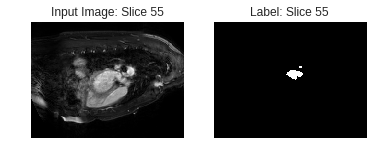

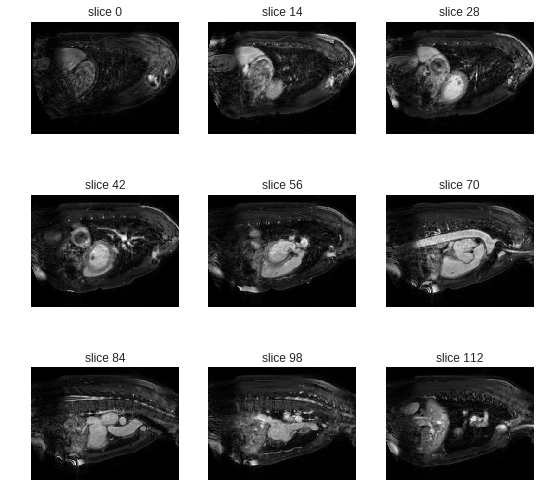

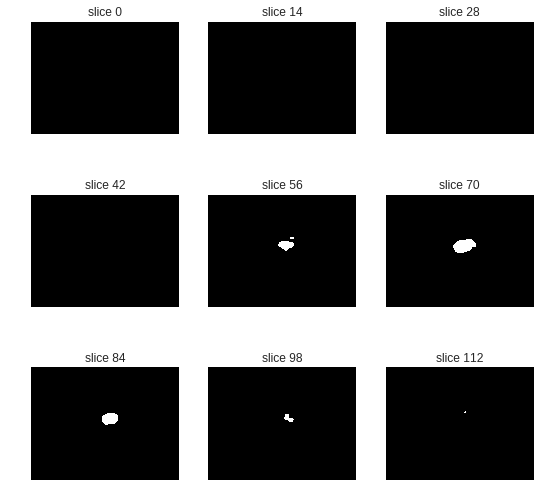

In [62]:
n_slice = 55
every_ = 14
show_imgs_2D(n_slice, input_img, input_label, mode = 'zxy')

plotScan(input_img, 0, every_)
plotScan(input_label, 0, every_)